In [39]:
import librosa # to extract speech features
import soundfile # to read audio file
import os, glob, pickle # pickle to save model after training
import numpy as np # a Python library used for working with arrays
import scipy.io.wavfile
import matplotlib.pyplot as plt # for graphs
import IPython.display as ipd # to play audio directly in the IPython notebook
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good the model is

In [40]:
# all the emotions on RAVDESS dataset
emotions = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# the emotions that we are considering
observed_emotions = {
    "angry",
    "sad",
    "fearful",
    "happy"
}


In [41]:
def load_data(test_size=0.25):
    X, y = [], []
    for file in glob.glob("speech-emotion-recognition-ravdess-data\Actor_*\\*.wav"):
        basename = os.path.basename(file)
        emotion = emotions[basename.split("-")[2]]
        # we allow only observed_emotions we set
        if emotion not in observed_emotions:
            continue
        # extract speech features
        features = extract_feature(file, mfcc=True, chroma=True, mel=True)
        # add to data
        X.append(features)
        y.append(emotion)
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [42]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc") # Mel-frequency cepstral coefficients
    chroma = kwargs.get("chroma") # for analyzing music whose pitches can be meaningfully categorized
    mel = kwargs.get("mel") # mel frequency

    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32") # Data type of the returned array
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs)) # hstack() function is used to stack the sequence of input arrays horizontally
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
    return result

In [43]:
# load RAVDESS dataset, 75% training 25% testing
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

In [44]:
print("[1] Number of training samples:", X_train.shape[0])

print("[2] Number of testing samples:", X_test.shape[0])

# this is a vector of features extracted 
# using extract_features() function
print("[3] Number of features:", X_train.shape[1])

[1] Number of training samples: 576
[2] Number of testing samples: 192
[3] Number of features: 180


In [45]:
print(X_train)

[[-5.51817810e+02  4.86951370e+01 -1.33681412e+01 ...  8.63384106e-04
   7.99472677e-04  4.26924060e-04]
 [-6.65087524e+02  2.29272766e+01 -1.74016018e+01 ...  1.36153511e-04
   1.10750429e-04  6.43582825e-05]
 [-6.69089722e+02  7.25377655e+01  1.73291340e+01 ...  7.18934461e-06
   3.55077577e-06  1.66851635e-06]
 ...
 [-5.15770752e+02  5.33964844e+01 -4.86039495e+00 ...  5.82872657e-04
   2.96204613e-04  2.06498400e-04]
 [-4.64181152e+02  5.75236168e+01 -1.57911339e+01 ...  2.51265010e-04
   1.41929195e-04  8.88372742e-05]
 [-5.51123596e+02  1.56828747e+01 -3.32734489e+01 ...  8.73497629e-05
   4.41653683e-05  3.30574185e-05]]


In [46]:
print(X_test)

[[-5.82624268e+02  5.12703247e+01 -1.69332314e+01 ...  3.31570991e-05
   1.75291807e-05  1.36474782e-05]
 [-6.20173645e+02  5.40922966e+01 -9.96196842e+00 ...  1.01211244e-05
   4.39431778e-06  2.46344348e-06]
 [-6.41507202e+02  5.29719200e+01  1.51824903e+01 ...  1.77020047e-04
   8.97201753e-05  6.36034893e-05]
 ...
 [-5.11530518e+02  4.19838066e+01  3.34410810e+00 ...  6.06912363e-04
   5.72417805e-04  4.06772335e-04]
 [-5.77326538e+02  4.17861671e+01  8.80532742e+00 ...  4.35870861e-05
   2.48473116e-05  1.93464130e-05]
 [-5.32266785e+02  3.36629715e+01 -2.18839817e+01 ...  5.30534962e-05
   4.39303403e-05  3.04776077e-05]]


In [47]:
print(y_train)

['happy', 'happy', 'happy', 'happy', 'angry', 'happy', 'angry', 'sad', 'fearful', 'happy', 'happy', 'angry', 'fearful', 'angry', 'sad', 'angry', 'fearful', 'fearful', 'happy', 'fearful', 'happy', 'angry', 'angry', 'happy', 'fearful', 'happy', 'angry', 'fearful', 'angry', 'fearful', 'happy', 'sad', 'angry', 'angry', 'fearful', 'fearful', 'fearful', 'sad', 'sad', 'sad', 'angry', 'sad', 'sad', 'happy', 'happy', 'fearful', 'fearful', 'happy', 'sad', 'fearful', 'angry', 'angry', 'angry', 'angry', 'angry', 'happy', 'sad', 'angry', 'angry', 'fearful', 'fearful', 'happy', 'happy', 'angry', 'fearful', 'fearful', 'angry', 'sad', 'fearful', 'happy', 'angry', 'angry', 'angry', 'sad', 'angry', 'fearful', 'fearful', 'sad', 'happy', 'angry', 'happy', 'sad', 'angry', 'sad', 'fearful', 'angry', 'sad', 'fearful', 'fearful', 'angry', 'happy', 'fearful', 'sad', 'angry', 'happy', 'angry', 'fearful', 'sad', 'happy', 'sad', 'sad', 'sad', 'happy', 'happy', 'fearful', 'fearful', 'sad', 'sad', 'fearful', 'fearf

In [48]:
print(y_test)

['happy', 'sad', 'happy', 'happy', 'fearful', 'fearful', 'fearful', 'angry', 'sad', 'happy', 'sad', 'fearful', 'happy', 'sad', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'happy', 'fearful', 'angry', 'sad', 'fearful', 'sad', 'angry', 'angry', 'sad', 'happy', 'happy', 'fearful', 'fearful', 'angry', 'angry', 'happy', 'fearful', 'fearful', 'happy', 'fearful', 'sad', 'angry', 'sad', 'sad', 'fearful', 'angry', 'sad', 'angry', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'sad', 'happy', 'fearful', 'happy', 'sad', 'angry', 'fearful', 'angry', 'angry', 'angry', 'angry', 'angry', 'fearful', 'fearful', 'sad', 'happy', 'fearful', 'happy', 'sad', 'fearful', 'angry', 'happy', 'sad', 'fearful', 'fearful', 'fearful', 'angry', 'sad', 'fearful', 'sad', 'angry', 'sad', 'happy', 'happy', 'sad', 'angry', 'fearful', 'happy', 'sad', 'angry', 'sad', 'fearful', 'happy', 'angry', 'angry', 'angry', 'fearful', 'angry', 'fearful', 'sad', 'fearful', 'sad', 'happy', 'sad', 'angry', 'angry', 'sad', 'fearfu

In [49]:
# best model
model_parameters = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [50]:
# initialize Multi Layer Perceptron classifier
model = MLPClassifier(**model_parameters)

In [55]:
# train the model

model.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [56]:
# predict 25% of data to measure how good we are
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.27%


In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.78      0.76        45
     fearful       0.81      0.51      0.62        49
       happy       0.57      0.70      0.63        46
         sad       0.71      0.79      0.75        52

    accuracy                           0.69       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.71      0.69      0.69       192



In [59]:
file1 = ('03-01-08-02-01-02-02.wav')

In [60]:
ipd.Audio(file1)

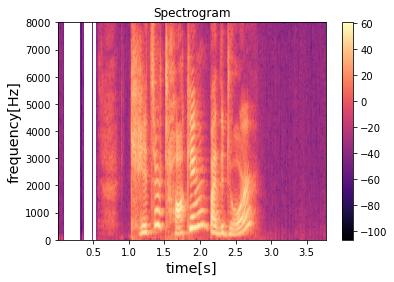

In [62]:
sample_rate, X = scipy.io.wavfile.read('03-01-08-02-01-02-02.wav')

plt.xlabel('time[s]', fontsize='x-large')
plt.ylabel('frequency[Hz]', fontsize='x-large')
plt.title('Spectrogram')
cmap = plt.get_cmap('magma')
plt.specgram(X, NFFT=256, pad_to=256, mode='magnitude', Fs=sample_rate, cmap=cmap)
plt.colorbar()
plt.show()


In [63]:
feature = extract_feature(file1, mfcc=True, chroma=True, mel=True)

In [64]:
y_pre = model.predict([feature])
print(y_pre)

['angry']


In [37]:
# opening the corresponding webpage for the recognised emotion
import webbrowser
if y_pre[0]=="happy":
    webbrowser.open('happy.html')
elif y_pre[0]=="sad":
    webbrowser.open('sad.html')
elif y_pre[0]=="angry":
    webbrowser.open('angry.html')
elif y_pre[0]=="fearful":
    webbrowser.open('fearful.html')
else:
    webbrowser.open('none.html')